In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("train_images shape: {}".format(train_images.shape))
print("train_labels shape: {}".format(train_labels.shape))
print("test_images shape: {}".format(test_images.shape))
print("test_labels shape: {}".format(test_labels.shape))

train_images shape: (60000, 28, 28)
train_labels shape: (60000,)
test_images shape: (10000, 28, 28)
test_labels shape: (10000,)


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
# visualizing data

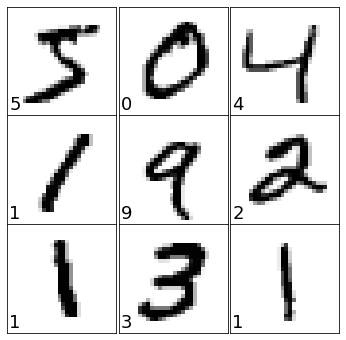

In [4]:
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 18
plt.figure(figsize=(6,6))

for j in range(9):
    plt.subplot(3,3, j+1)
    plt.imshow(train_images[j],cmap=plt.cm.binary)
    plt.tick_params(bottom=False,left=False,labelbottom=False,labelleft=False)
    plt.text(0,26,'%d'%train_labels[j])
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [5]:
# changing shape and normalizing data

In [6]:
train_images=train_images.reshape((60000, 28*28)) # change the shape
train_images=train_images.astype('float32')/255 # normalization

test_images=test_images.reshape((10000, 28*28)) # change the shape
test_images=test_images.astype('float32')/255 # normalization

In [7]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print("train_labels shape: ".format(train_labels.shape))
print("test_labels shape: ".format(test_labels.shape))

print("The first 10 rows in the train_labels:\n{}".format(train_labels[:10]))

train_labels shape: 
test_labels shape: 
The first 10 rows in the train_labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [8]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
#building neural network

In [10]:
from keras import models, layers

network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [11]:
print("The numebr of parameters for weights (first layer): ", 28*28*512)
print("The numebr of all parameters for weights (first layer): ", 28*28*512+512)

print("The numebr of parameters for weights (second layer): ", 10*512)
print("The numebr of all parameters for weights (second layer): ", 10*512+10)

The numebr of parameters for weights (first layer):  401408
The numebr of all parameters for weights (first layer):  401920
The numebr of parameters for weights (second layer):  5120
The numebr of all parameters for weights (second layer):  5130


In [12]:
network.compile(optimizer='rmsprop',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])
                
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2552 - accuracy: 0.9263
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1036 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0689 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0502 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0376 - accuracy: 0.9885


In [13]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("test_loss", test_loss)
print("test_acc: ", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0706 - accuracy: 0.9789
test_loss 0.07056135684251785
test_acc:  0.9789000153541565


In [14]:
network.predict(test_images)

313/313 [==============================] - 1s 2ms/step


array([[4.9058664e-09, 2.1974207e-11, 2.5333309e-06, ..., 9.9996305e-01,
        3.6854346e-09, 2.4278492e-08],
       [1.5149463e-11, 2.0048088e-07, 9.9999940e-01, ..., 5.8694386e-16,
        9.1087262e-09, 3.0940004e-18],
       [8.3779568e-08, 9.9946576e-01, 1.1708005e-04, ..., 3.3537266e-04,
        5.2560961e-05, 1.4060764e-07],
       ...,
       [7.0276983e-12, 2.9234434e-10, 6.0707959e-11, ..., 1.1578307e-04,
        8.2758696e-08, 8.1832759e-06],
       [4.7187230e-11, 1.2419795e-12, 7.5288213e-13, ..., 1.0450147e-11,
        3.8132788e-07, 9.0472253e-13],
       [2.2799412e-12, 5.8506646e-16, 2.8399141e-11, ..., 9.2751319e-15,
        7.9130474e-13, 1.7724207e-14]], dtype=float32)